## Required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
import joblib
import pickle
import re
import snscrape.modules.twitter as sntwitter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

### Let's start off by scraping our data!

In [2]:
#or if you'd rather not, import directly
real = pd.read_csv('/Users/lucashawranke/Documents/data-science/sarcasm-scanner/data/real_tweets.csv')
satire = pd.read_csv('/Users/lucashawranke/Documents/data-science/sarcasm-scanner/data/satire_tweets.csv')

In [231]:
# making lists to append all tweets/data to
# real = []
# satire = []

In [232]:
# using sntwitter to scrape tweets and append data to lists
# for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:cnnbrk').get_items()):
#     if i>5000:
#         break
#     real.append([tweet.content])

In [233]:
# for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:enews').get_items()):
#     if i>5000:
#         break
#     real.append([tweet.content])

In [234]:
# real = pd.DataFrame(real)

In [235]:
# real.to_csv('/Users/lucashawranke/Documents/data-science/sarcasm-scanner/data/real_tweets.csv') #mac
# real.to_csv('/Users/lucas/data-science/sarcasm-scanner/data/real_tweets.csv') #pc

In [236]:
# for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:theonion').get_items()):
#     if i>5000:
#         break
#     satire.append([tweet.content])

In [237]:
# for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:clickhole').get_items()):
#     if i>5000:
#         break
#     satire.append([tweet.content])

In [238]:
# satire = pd.DataFrame(satire)

In [239]:
# satire.to_csv('/Users/lucashawranke/documents/data-science/sarcasm-scanner/data/satire_tweets.csv') #pc

In [3]:
real['Authenticity'] = 'real'
satire['Authenticity'] = 'satire'
df = pd.concat([real, satire])

In [4]:
df.rename(columns={'0': 'Tweets'}, inplace=True)
df.rename(columns={'Unnamed: 0': 'No.'}, inplace=True)

In [5]:
df

,No.,Tweets,Authenticity
0,0,Nick Cannon is getting some rest after coming ...,real
1,1,Team USA eliminated from the World Cup after a...,real
2,2,A man has been arrested and charged with murde...,real
3,3,Right-wing conspiracy theorist Alex Jones file...,real
4,4,"America added a robust 263,000 jobs last month...",real
...,...,...,...
9997,9997,Are You A Widow? https://t.co/UWZLPewsKD https...,satire
9998,9998,Michael B. Jordan Said What?! https://t.co/y4F...,satire
9999,9999,Did ‘Sesame Street’ Go Too Far With Its Episod...,satire
10000,10000,Close Fucking Call: This Product That Got A Ne...,satire


In [6]:
df['Tweets'] = df['Tweets'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) #removing links from df

In [7]:
df

,No.,Tweets,Authenticity
0,0,Nick Cannon is getting some rest after coming ...,real
1,1,Team USA eliminated from the World Cup after a...,real
2,2,A man has been arrested and charged with murde...,real
3,3,Right-wing conspiracy theorist Alex Jones file...,real
4,4,"America added a robust 263,000 jobs last month...",real
...,...,...,...
9997,9997,Are You A Widow?,satire
9998,9998,Michael B. Jordan Said What?!,satire
9999,9999,Did ‘Sesame Street’ Go Too Far With Its Episod...,satire
10000,10000,Close Fucking Call: This Product That Got A Ne...,satire


In [8]:
df.to_csv('/Users/lucashawranke/Documents/data-science/sarcasm-scanner/data/df.csv') #mac

In [9]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(real['0']))

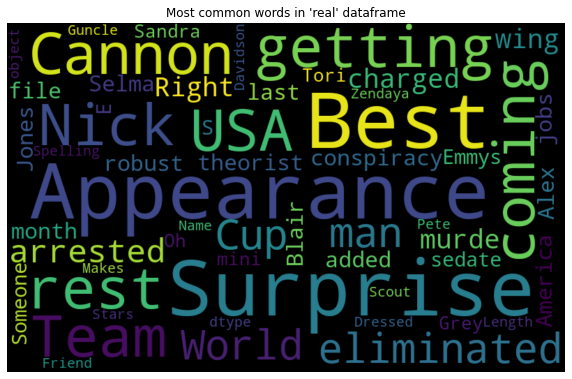

In [10]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words in 'real' dataframe")
plt.show()

In [18]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(satire['0']))

### (I forgot to remove links from the satire tweets dataframe, so this lets me so that easily)

In [14]:
satire['0'] = satire['0'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

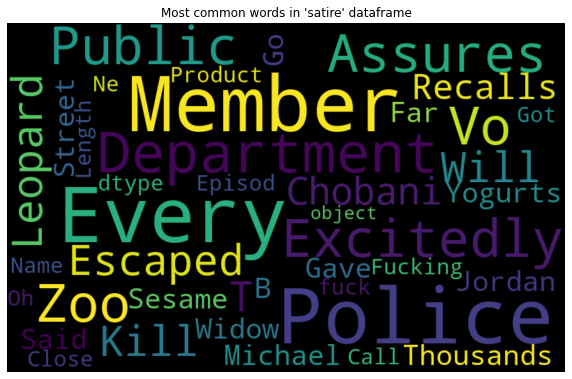

In [19]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words in 'satire' dataframe")
plt.show()

### Creating/Running MultinomialNB Model

In [ ]:
X_train = real[:8000]
X_test = real[-2000:]

y_train = satire[:8000]
y_test = satire[-2000:]

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

In [248]:
mnb = MultinomialNB()
vectorizer = TfidfVectorizer(stop_words = 'english')

pipe = Pipeline([('vectorizer', vectorizer), ('nb', mnb)])
pipe.fit(train.Tweets, train.Authenticity)

predictions = pipe.predict(test.Tweets)
print('accuracy: ', accuracy_score(test['Authenticity'], predictions))
print('confusion matrix: ', confusion_matrix(test['Authenticity'], predictions))

accuracy:  0.9087728067983004
confusion matrix:  [[1925   91]
 [ 274 1711]]


### As you can see, this model has an accuracy of 90.8%. Although we might be able to do better, let's test it out and see what happens:

In [249]:
headline = np.array([["ISIS Takes Credit For Relatives Overstaying Welcome At Thanksgiving"]])
predictions = pipe.predict(headline[0])

print(predictions)

['satire']


### Correct! This article is from [a different](https://web.archive.org/web/20221204015813/http://www.cap-news.com/) satire news site. Let's save the model either way:

In [250]:
joblib.dump(pipe, '/Users/lucashawranke/Documents/data-science/sarcasm-scanner/mnb.pkl') #mac
# joblib.dump(pipe, '/Users/lucas/data-science/sarcasm-scanner/model.pkl') #pc

['/Users/lucashawranke/Documents/data-science/sarcasm-scanner/mnb.pkl']

In [251]:
#mac
# with open('/Users/lucashawranke/Documents/data-science/sarcasm-scanner/model.pkl', 'wb') as files:
#     pickle.dump(pipe, files)
#pc
# with open('/Users/lucas/data-science/sarcasm-scanner/model.pkl', 'wb') as files:
#     pickle.dump(pipe, files)

### Creating LinearSVC Model

In [252]:
svc = LinearSVC()
vectorizer = TfidfVectorizer(stop_words = 'english')

pipe = Pipeline([('vectorizer', vectorizer), ('svc', svc)])
pipe.fit(train.Tweets, train.Authenticity)
predictions = pipe.predict(test.Tweets)
print('accuracy: ', accuracy_score(test['Authenticity'], predictions))
print('confusion matrix:', confusion_matrix(test['Authenticity'], predictions))

accuracy:  0.9492626843289178
confusion matrix: [[1890  126]
 [  77 1908]]


### Saving LinearSVC Model

In [253]:
joblib.dump(pipe, '/Users/lucashawranke/documents/data-science/sarcasm-scanner/lsvc.pkl') #mac
# joblib.dump(pipe, '/Users/lucas/data-science/sarcasm-scanner/model2.pkl') #pc

['/Users/lucashawranke/documents/data-science/sarcasm-scanner/lsvc.pkl']

### Other models I have tried; Logistic Regression, Random Forest Classifier, Decision Tree Classifier, and K Neighbors Classifier

In [254]:
lr = LogisticRegression()
vectorizer = TfidfVectorizer(stop_words = 'english')

pipe = Pipeline([('vectorizer', vectorizer), ('lr', lr)])
pipe.fit(train.Tweets, train.Authenticity)
predictions = pipe.predict(test.Tweets)
print('accuracy: ', accuracy_score(test['Authenticity'], predictions))
print('confusion matrix:', confusion_matrix(test['Authenticity'], predictions))

accuracy:  0.939265183704074
confusion matrix: [[1855  161]
 [  82 1903]]


In [255]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
vectorizer = TfidfVectorizer(stop_words = 'english')

pipe = Pipeline([('vectorizer', vectorizer), ('rf', rf)])
pipe.fit(train.Tweets, train.Authenticity)
predictions = pipe.predict(test.Tweets)
print('accuracy: ', accuracy_score(test['Authenticity'], predictions))
print('confusion matrix:', confusion_matrix(test['Authenticity'], predictions))

accuracy:  0.9265183704073982
confusion matrix: [[1835  181]
 [ 113 1872]]


In [256]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
vectorizer = TfidfVectorizer(stop_words = 'english')

pipe = Pipeline([('vectorizer', vectorizer), ('dt', dt)])
pipe.fit(train.Tweets, train.Authenticity)
predictions = pipe.predict(test.Tweets)
print('accuracy: ', accuracy_score(test['Authenticity'], predictions))
print('confusion matrix:', confusion_matrix(test['Authenticity'], predictions))

accuracy:  0.8437890527368158
confusion matrix: [[1572  444]
 [ 181 1804]]


In [257]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
vectorizer = TfidfVectorizer(stop_words = 'english')

pipe = Pipeline([('vectorizer', vectorizer), ('knn', knn)])
pipe.fit(train.Tweets, train.Authenticity)
predictions = pipe.predict(test.Tweets)
print('accuracy: ', accuracy_score(test['Authenticity'], predictions))
print('confusion matrix:', confusion_matrix(test['Authenticity'], predictions))

accuracy:  0.8780304923769058
confusion matrix: [[1843  173]
 [ 315 1670]]
